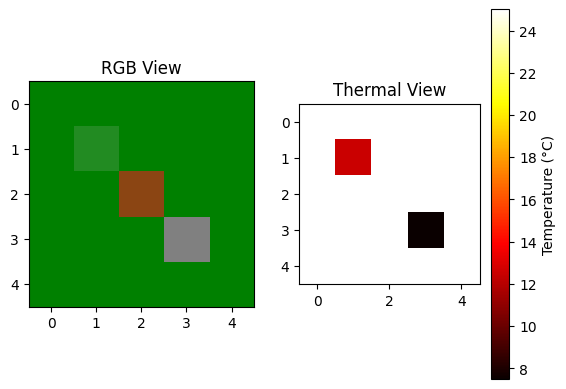

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Item class
class Item:
    def __init__(self, name, position, color, thermal_value):
        self.name = name
        self.position = position
        self.color = color  # RGB value as a tuple (R, G, B)
        self.thermal_value = thermal_value

    def get_rgb(self):
        return self.color

    def get_thermal(self):
        return self.thermal_value


# Block class
class Block:
    def __init__(self, position, default_color=(0, 128, 0)):
        self.position = position
        self.items = []
        self.default_color = default_color  # Grass as the default

    def add_item(self, item):
        self.items.append(item)

    def get_rgb_view(self):
        if self.items:
            # Combine RGB of all items (simplified as the average)
            avg_rgb = np.mean([item.get_rgb() for item in self.items], axis=0)
            return avg_rgb
        else:
            return self.default_color

    def get_thermal_view(self, temperature):
        if self.items:
            # Combine thermal values of items (average)
            avg_thermal = np.mean([item.get_thermal() for item in self.items])
            return avg_thermal * temperature
        else:
            return temperature  # Base temperature for an empty block


# Map class
class Map:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.blocks = [[Block((i, j)) for j in range(width)] for i in range(height)]

    def add_item_to_block(self, x, y, item):
        self.blocks[x][y].add_item(item)

    def get_rgb_view(self):
        rgb_map = np.zeros((self.height, self.width, 3))
        for i in range(self.height):
            for j in range(self.width):
                rgb_map[i, j] = self.blocks[i][j].get_rgb_view()
        return rgb_map

    def get_thermal_view(self, temperature):
        thermal_map = np.zeros((self.height, self.width))
        for i in range(self.height):
            for j in range(self.width):
                thermal_map[i, j] = self.blocks[i][j].get_thermal_view(temperature)
        return thermal_map


# Example of using the classes
if __name__ == "__main__":
    # Create a 5x5 map
    my_map = Map(5, 5)

    # Add items to blocks
    tree = Item("Tree", (1, 1), (34, 139, 34), 0.5)  # Green with medium thermal absorption
    house = Item("House", (2, 2), (139, 69, 19), 1.0)  # Brown with high thermal absorption
    road = Item("Road", (3, 3), (128, 128, 128), 0.3)  # Gray with low thermal absorption

    my_map.add_item_to_block(1, 1, tree)
    my_map.add_item_to_block(2, 2, house)
    my_map.add_item_to_block(3, 3, road)

    # Generate RGB and thermal views
    rgb_view = my_map.get_rgb_view()
    thermal_view = my_map.get_thermal_view(temperature=25)  # Assume 25 degrees as base temp

    # Plot RGB view
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_view / 255)  # Normalize RGB for plotting
    plt.title("RGB View")

    # Plot thermal view
    plt.subplot(1, 2, 2)
    plt.imshow(thermal_view, cmap='hot', interpolation='nearest')
    plt.title("Thermal View")
    plt.colorbar(label="Temperature (°C)")

    plt.show()
